In [1]:
import sys
sys.path.append("../src") 
sys.path.append("../data") 


import SDE_class as sde
import importlib
importlib.reload(sde)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import util as util
importlib.reload(util)

<module 'util' from '../src/util.py'>

In [2]:
term=5
step=1
init=np.array([0.])
repeat_number=1

In [3]:
mymodel = sde.SDE_Markov(mymat=np.array([[0.]]), myvar =np.array([[1.]]),myinit=np.array([1.]),myscale=1.,myterm=term,step_size=step)

In [5]:
term=7
step=1
now_position=np.array([0.])
repeat_number=30000
matrix=np.zeros([term+1,repeat_number+1])

for j in range(repeat_number):
    now_position=np.array([0])
    for k in range(term):
        new_position = mymodel.one_step(now_position)
        matrix[k+1,j+1]=new_position
        now_position = new_position
#print(matrix)

In [6]:
cov_matrix=np.zeros([term+1,term+1])
for j in range(term+1):
    for k in range(term+1):
        mean_j=np.mean(matrix[j,:])
        mean_k=np.mean(matrix[k,:])
        mean_jk=(np.dot(matrix[j,:],matrix[k,:]))/repeat_number
        cov=mean_jk-mean_k*mean_j
        cov_matrix[j,k]=cov
print(cov_matrix)


[[ 0.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.99785457  1.00038655  1.00402894  1.00634399  1.00006431
   1.0036511   0.9979836 ]
 [ 0.          1.00038655  2.00163921  2.00396599  2.00554407  1.98990788
   1.99217738  1.98480251]
 [ 0.          1.00402894  2.00396599  3.00858393  2.99517715  2.98010544
   2.97925248  2.9638617 ]
 [ 0.          1.00634399  2.00554407  2.99517715  3.97746197  3.95705978
   3.95609215  3.93998333]
 [ 0.          1.00006431  1.98990788  2.98010544  3.95705978  4.93636437
   4.9339841   4.91997994]
 [ 0.          1.0036511   1.99217738  2.97925248  3.95609215  4.9339841
   5.93161625  5.92273135]
 [ 0.          0.9979836   1.98480251  2.9638617   3.93998333  4.91997994
   5.92273135  6.91322559]]


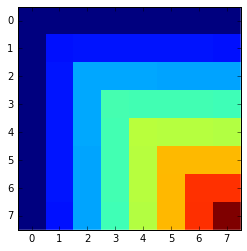

In [7]:
plt.imshow(cov_matrix, interpolation = "None")